In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

Mešavina normalnih raspodela (eng. mixture of Gaussians) predstavlja model klasterovanja zasnovan na pretpostavci da se podaci mogu podeliti u određeni broj relativno kompaktnih globularnih klastera čiji se oblik može dobro opisati normalnim raspodelama sa različitim prosecima i matricama kovarijacije. Proseci jasno definišu pozicije klastera u
prostoru, dok matrice kovarijacije opisuju njihov oblik i orijentaciju u prostoru.

Prvo ćemo napraviti jedan sintetički skup podataka koji sadrži dva klastera podataka od kojih svaki ima svoju Gausovu raspodelu.

In [4]:
n_samples = 300

shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

data = np.vstack([shifted_gaussian, stretched_gaussian])

In [5]:
data.shape

(600, 2)

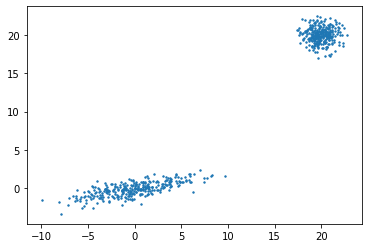

In [6]:
plt.scatter(data[:, 0], data[:, 1], s=2)
plt.show()

Korišćenje modela klasterovanja zasnovanog na mešavini normalnih raspodela moguće je kroz klasu `GaussianMixture` paketa `mixture`. I ova klasa ima svoje `fit` i `predict` metode kojima se, redom, ocenjuju parametri modela korišćenjem algoritma maksimizacije očekivanja i pridružuju obeležja instancama skupa. Parametrom `n_components` se zadaje broj klastera.

In [7]:
mog = GaussianMixture(n_components=2)
mog.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
labels = mog.predict(data)

In [9]:
np.unique(labels)

array([0, 1])

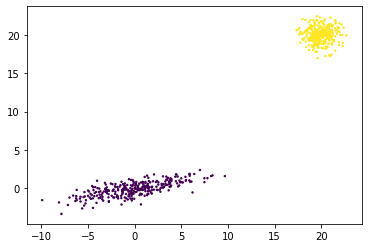

In [10]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=2)
plt.show()

Usled probabilističke prirode ovog modela, moguće je dobiti ocenu verovatnoće pripadnosti instance klasteru.

In [11]:
probabilities = mog.predict_proba(data)
probabilities.shape

(600, 2)

Na primer, ocene verovatnoće pripadnosti klasterima za instance sa indeksima od 30 do 40 su:

In [12]:
probabilities[30:40, :]

array([[5.34638100e-135, 1.00000000e+000],
       [9.92997982e-114, 1.00000000e+000],
       [2.41180265e-132, 1.00000000e+000],
       [1.47661115e-150, 1.00000000e+000],
       [3.26058237e-142, 1.00000000e+000],
       [2.03075710e-139, 1.00000000e+000],
       [7.07379091e-117, 1.00000000e+000],
       [2.66696921e-127, 1.00000000e+000],
       [6.88320116e-132, 1.00000000e+000],
       [6.40448457e-141, 1.00000000e+000]])

Vrednosti proseka i kovarijanse se mogu očitati kroz svojstva `means_` i `covariances_`.

In [13]:
mog.means_

array([[-0.13607006, -0.07059606],
       [19.91453549, 19.97556345]])

In [14]:
mog.covariances_

array([[[1.13328040e+01, 2.25048269e+00],
        [2.25048269e+00, 8.77009968e-01]],

       [[1.02179964e+00, 3.28158679e-03],
        [3.28158679e-03, 9.90375215e-01]]])

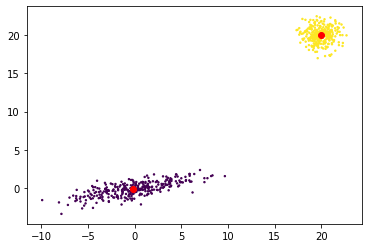

In [15]:
plt.scatter(data[:, 0], data[:, 1], c=labels, s=2)
plt.scatter(mog.means_[0][0], mog.means_[0][1], c='red')
plt.scatter(mog.means_[1][0], mog.means_[1][1], c='red')
plt.show()